# Assignment
- Start a clean notebook.
- Get the [Caterpillar data from Kaggle](https://www.kaggle.com/c/caterpillar-tube-pricing/data).
- Do train/validate/test split.
- Select features from `train_set.csv`, `tube.csv`, and at least one more file.
- Fit a model.
- Get your validation RMSLE (or RMSE with log-transformed targets).
- [Submit](https://www.kaggle.com/c/caterpillar-tube-pricing/submit) your predictions to the Kaggle competition.
- Commit your notebook to your fork of the GitHub repo.

## Stretch Goals
- Improve your scores on Kaggle.
- Make visualizations and share on Slack.
- Look at [Kaggle Kernels](https://www.kaggle.com/c/caterpillar-tube-pricing/kernels) for ideas about feature engineerng and visualization.

Read [Better Explained](https://betterexplained.com/) Exponents & Logs series:

1. [An Intuitive Guide To Exponential Functions & e](https://betterexplained.com/articles/an-intuitive-guide-to-exponential-functions-e/)
2. [Demystifying the Natural Logarithm (ln)](https://betterexplained.com/articles/demystifying-the-natural-logarithm-ln/)
3. [A Visual Guide to Simple, Compound and Continuous Interest Rates](https://betterexplained.com/articles/a-visual-guide-to-simple-compound-and-continuous-interest-rates/)
4. [Common Definitions of e (Colorized)](https://betterexplained.com/articles/definitions-of-e-colorized/)
5. [Understanding Exponents (Why does 0^0 = 1?)](https://betterexplained.com/articles/understanding-exponents-why-does-00-1/)
6. [Using Logarithms in the Real World](https://betterexplained.com/articles/using-logs-in-the-real-world/)
7. [How To Think With Exponents And Logarithms](https://betterexplained.com/articles/think-with-exponents/)
8. [Understanding Discrete vs. Continuous Growth](https://betterexplained.com/articles/understanding-discrete-vs-continuous-growth/)
9. [What does an exponent really mean?](https://betterexplained.com/articles/what-does-an-exponent-mean/)
10. [Q: Why is e special? (2.718..., not 2, 3.7 or another number?)](https://betterexplained.com/articles/q-why-is-e-special-2-718-not-other-number/)

In [ ]:
!kaggle competitions download -c caterpillar-tube-pricing

In [128]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [144]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [120]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(trainval.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [4]:
trainval.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [118]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [191]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

def replace_categoricals():

def wrangle(df):
    df_c = df.copy()
    # Date features
    df_c['quote_date'] = pd.to_datetime(df_c['quote_date'], infer_datetime_format=True)
    df_c['quote_day'] = df_c['quote_date'].dt.day
    df_c['quote_month'] = df_c['quote_date'].dt.month
    df_c['quote_year'] = df_c['quote_date'].dt.year
    df_c = df_c.drop(columns='quote_date')
    
    # Merge tube df
    tube = pd.read_csv('competition_data/tube.csv')
    tube = tube.fillna(value='MISSING', axis=1)
    df_c = df_c.merge(tube, how='left')
    
    # Bill of Materials
    bom = pd.read_csv('competition_data/bill_of_materials.csv')
    bom_categoricals = bom.select_dtypes(exclude='number').columns.tolist()
    bom = bom.select_dtypes(exclude='number').fillna(value='MISSING', axis=1)
    df_c = df_c.merge(bom, how='left')
    
    # Specs
    specs = pd.read_csv('competition_data/specs.csv')
    specs = specs.fillna(value='MISSING', axis=1)
    df_c = df_c.merge(specs, how='left')
    
    #competition_data/comp_nut.csv
    comp_nut = pd.read_csv('competition_data/comp_nut.csv')
    comp_nut = comp_nut.fillna(value='MISSING', axis=1)
    df_c = df_c.merge(comp_nut, how='left')

## Investigate other files we can join to our dataframe
#     for path in glob('competition_data/*.csv'):
#         p_df = pd.read_csv(path)
#         shared_columns = set(p_df.columns) & set(df_c.columns)
#         if shared_columns:
#             print(path, p_df.shape)
#             print(df.columns.tolist(), '\n')

    return df_c

trainval = wrangle(trainval)
test = wrangle(test)

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [122]:
from sklearn.model_selection import train_test_split

train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies
)

In [182]:
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)].drop(columns='tube_assembly_id')
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)].drop(columns='tube_assembly_id')
train.shape, val.shape, trainval.shape

((22502, 40), (7711, 40), (30213, 41))

In [183]:
train['component_id_6'].unique()

array(['MISSING', 'C-0353', 'C-1920', 'C-0663', 'C-0378', 'C-0965',
       'C-0934', 'C-0981', 'C-2005'], dtype=object)

In [178]:
train.isnull().sum()

tube_assembly_id      0
supplier              0
annual_usage          0
min_order_quantity    0
bracket_pricing       0
quantity              0
cost                  0
quote_day             0
quote_month           0
quote_year            0
material_id           0
diameter              0
wall                  0
length                0
num_bends             0
bend_radius           0
end_a_1x              0
end_a_2x              0
end_x_1x              0
end_x_2x              0
end_a                 0
end_x                 0
num_boss              0
num_bracket           0
other                 0
component_id_1        0
quantity_1            0
component_id_2        0
quantity_2            0
component_id_3        0
quantity_3            0
component_id_4        0
quantity_4            0
component_id_5        0
quantity_5            0
component_id_6        0
quantity_6            0
component_id_7        0
quantity_7            0
component_id_8        0
quantity_8            0
dtype: int64

In [190]:
train.dtypes

supplier               object
annual_usage            int64
min_order_quantity      int64
bracket_pricing        object
quantity                int64
cost                  float64
quote_day               int64
quote_month             int64
quote_year              int64
material_id            object
diameter              float64
wall                  float64
length                float64
num_bends               int64
bend_radius           float64
end_a_1x               object
end_a_2x               object
end_x_1x               object
end_x_2x               object
end_a                  object
end_x                  object
num_boss                int64
num_bracket             int64
other                   int64
component_id_1         object
quantity_1             object
component_id_2         object
quantity_2             object
component_id_3         object
quantity_3             object
component_id_4         object
quantity_4             object
component_id_5         object
quantity_5

In [98]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9558266070946456


In [16]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_val, y_val)
print('Validation R^2:', r2)

Validation R^2: 0.10207161403080578


In [20]:
y_pred = model.predict(X_val)
print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6831628410057518


In [186]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def random_forest_check(train, val):
    target = 'cost'
    y_train_log = np.log1p(train[target])
    y_val = np.log1p(val[target])
    X_train = train.drop(columns=[target])
    X_val = val.drop(columns=[target])
    
    pipeline = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(strategy='mean'),
        RandomForestRegressor(n_estimators=1000, n_jobs=-1, max_depth=40)
    )
    pipeline.fit(X_train, y_train_log)
    r2 = pipeline.score(X_val, y_val)
    print('Validation R^2:', r2)
    y_pred_log = pipeline.predict(X_val)
    print(f'Validation RMSE, Random Forest with all features')
    print(rmse(y_val, y_pred_log))
    fig, axs = plt.subplots(2, figsize=(20, 20))
    sns.distplot(y_val, label="True", ax=axs[0])
    sns.distplot(y_pred_log, label="Predicted", ax=axs[0])
    fig.legend()
    rf = pipeline.named_steps['randomforestregressor']
    importances = pd.Series(rf.feature_importances_, X_train.columns)
    importances.sort_values().plot.barh(color='grey', ax=axs[1]);

Validation R^2: 0.8658443060254717
Validation RMSLE, Random Forest with all features
0.3044590199297703


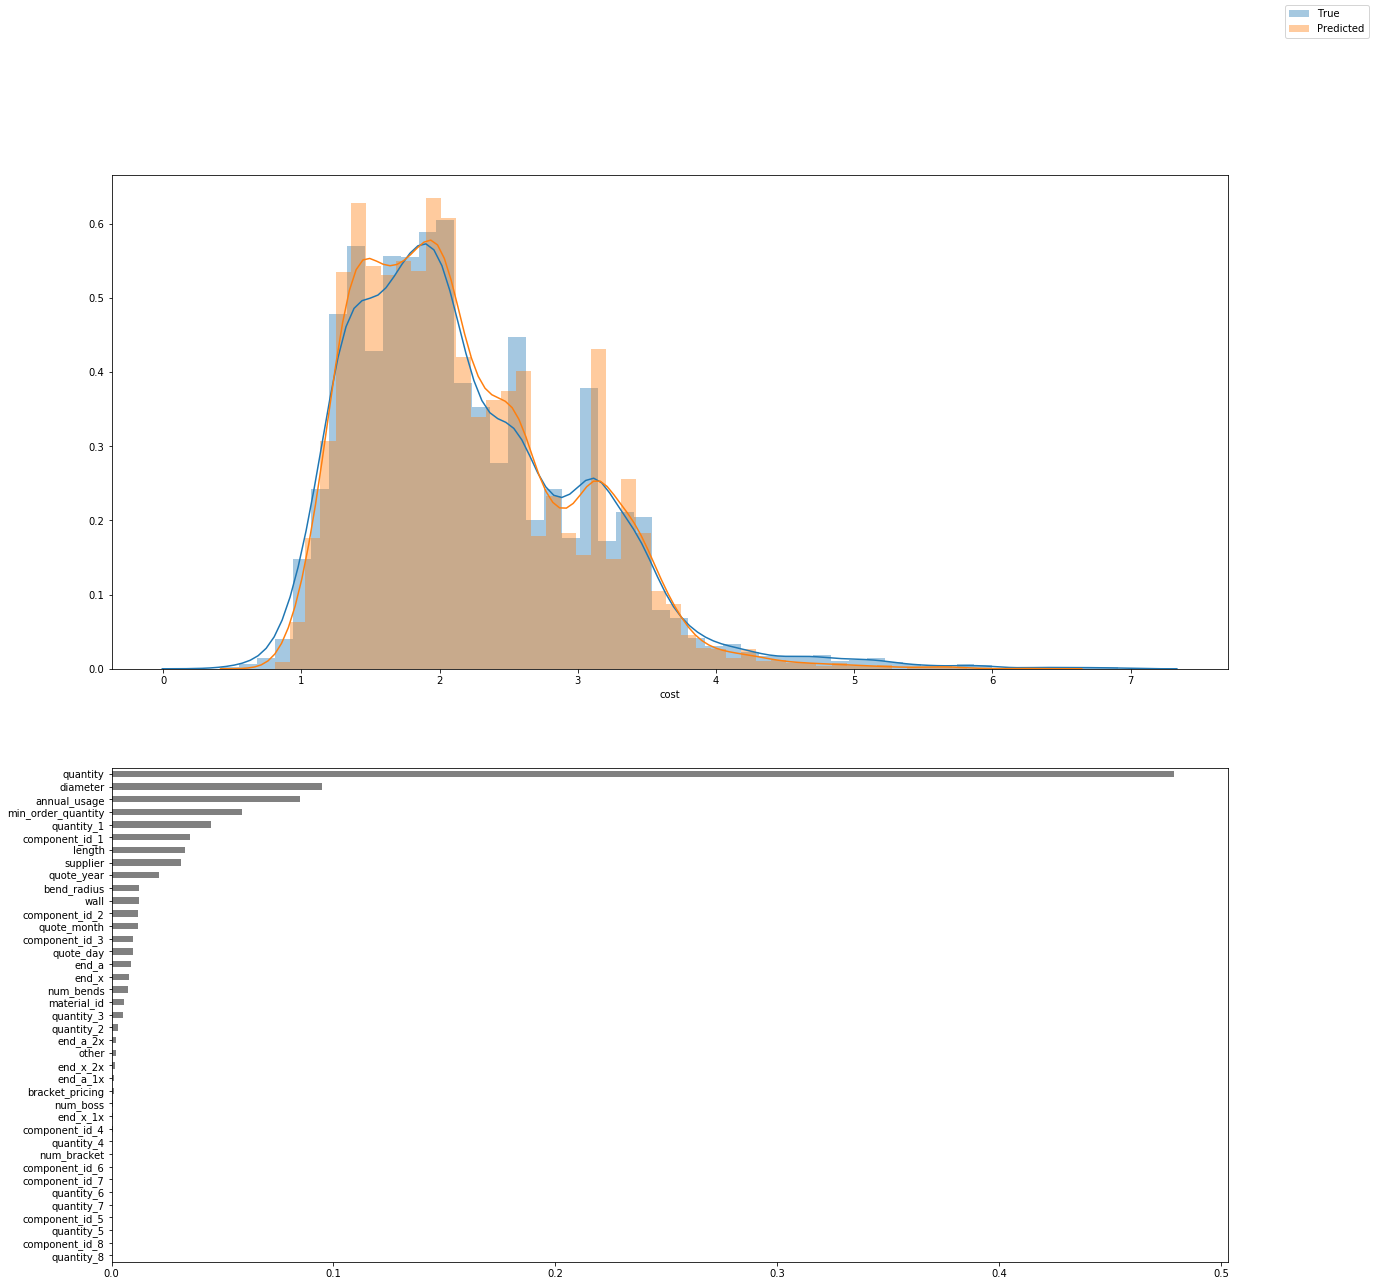

In [187]:
random_forest_check(train, val)